In [79]:
from models.autoencoder import AutoEncoder
from models.nnmodel import NNModel
from models.rfmodel import RFModel
from data_processor.data_processing import DataProcessing
import pandas as pd
import numpy as np 
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from data_processor.base_bars import BaseBars

In [80]:
features = pd.read_csv('/Users/andyliu/develop/andy/aapl_indicators_nosplit.csv')

In [81]:
features.head()

,Unnamed: 0,date,open,close,low,high,volume,bb_bbm,bb_bbh,bb_bbl,atr,macd,cci,ema,roc,sma12,sma5,stochastic_oscillator,mtm6,mtm12
0,25,2/8/00,4.0714,4.1027,3.9755,4.1451,0,3.742555,4.258224,3.226886,0.258809,0.028209,108.782044,3.824942,3.199598,3.819608,3.85050,75.940406,10.722189,3.199598
1,26,2/9/00,4.0804,4.0224,4.0179,4.1786,0,3.778050,4.267487,3.288613,0.251801,0.041007,99.551288,3.851270,6.000474,3.838583,3.94916,80.342311,12.344989,6.000474
2,27,2/10/00,4.0224,4.0536,3.9130,4.0670,0,3.825040,4.222099,3.427981,0.244815,0.053055,72.677158,3.878247,1.115019,3.842308,4.02192,84.268815,14.862146,1.115019
3,28,2/11/00,4.0581,3.8840,3.8706,4.0759,0,3.846470,4.205897,3.487043,0.241993,0.048361,40.605138,3.879014,-1.303585,3.838033,4.02728,62.924742,5.263158,-1.303585
4,29,2/14/00,3.9018,4.1362,3.8840,4.1384,0,3.873925,4.233795,3.514055,0.242879,0.064250,80.649750,3.913306,5.284325,3.855333,4.03978,94.663982,7.233226,5.284325


In [82]:
features = features.drop('Unnamed: 0', axis=1)
features = features.drop('date', axis=1)

In [83]:
features = features[~features.isin([np.nan, np.inf, -np.inf]).any(1)]

In [84]:
features.columns

Index(['open', 'close', 'low', 'high', 'volume', 'bb_bbm', 'bb_bbh', 'bb_bbl',
       'atr', 'macd', 'cci', 'ema', 'roc', 'sma12', 'sma5',
       'stochastic_oscillator', 'mtm6', 'mtm12'],
      dtype='object')

In [105]:
n = features.shape[0]
n_train = 7*n//10
n_val = 3*n//20

In [86]:
#features = features.drop('volume', axis=1)
#features = features.drop('Unnamed: 0', axis=1)
y = features['close']
x = features.drop('close', axis=1)

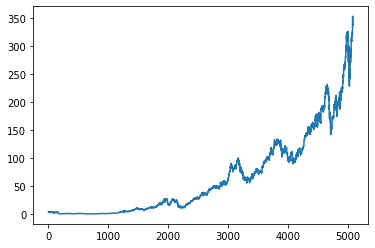

In [87]:
plt.plot(y)

In [88]:
x.shape

(5079, 17)

In [89]:
train = x.iloc[:n_train,:]
test = x.iloc[n_train:,:]

In [90]:
test.shape

(1524, 17)

In [91]:
a_train_y = y[:n_train]
train_y = a_train_y
a_test_y = y[n_train:]
test_y = a_test_y

In [92]:
a_train_x = train
a_test_x = test

In [93]:
a_train_x

,open,low,high,volume,bb_bbm,bb_bbh,bb_bbl,atr,macd,cci,ema,roc,sma12,sma5,stochastic_oscillator,mtm6,mtm12
0,4.0714,3.9755,4.1451,0,3.742555,4.258224,3.226886,0.258809,0.028209,108.782044,3.824942,3.199598,3.819608,3.85050,75.940406,10.722189,3.199598
1,4.0804,4.0179,4.1786,0,3.778050,4.267487,3.288613,0.251801,0.041007,99.551288,3.851270,6.000474,3.838583,3.94916,80.342311,12.344989,6.000474
2,4.0224,3.9130,4.0670,0,3.825040,4.222099,3.427981,0.244815,0.053055,72.677158,3.878247,1.115019,3.842308,4.02192,84.268815,14.862146,1.115019
3,4.0581,3.8706,4.0759,0,3.846470,4.205897,3.487043,0.241993,0.048361,40.605138,3.879014,-1.303585,3.838033,4.02728,62.924742,5.263158,-1.303585
4,3.9018,3.8840,4.1384,0,3.873925,4.233795,3.514055,0.242879,0.064250,80.649750,3.913306,5.284325,3.855333,4.03978,94.663982,7.233226,5.284325
5,4.1284,4.1161,4.2824,0,3.900820,4.287682,3.513958,0.237409,0.085045,138.698707,3.958198,17.096019,3.907042,4.06924,96.393589,4.327761,17.096019
6,4.2076,4.0089,4.2120,0,3.913990,4.304929,3.523051,0.237673,0.085945,79.482141,3.972999,9.818103,3.937358,4.07860,76.268923,-0.816535,9.818103
7,4.1161,4.0447,4.1239,0,3.916445,4.311455,3.521435,0.226353,0.088343,79.108264,3.990292,14.587756,3.980883,4.08842,79.997774,1.996321,14.587756
8,4.0893,3.9666,4.1206,0,3.916335,4.311281,3.521389,0.221185,0.078893,47.481847,3.988026,12.586779,4.017900,4.10628,61.905349,-1.980955,12.586779
9,3.9297,3.8148,4.1674,0,3.929840,4.325696,3.533984,0.230572,0.077889,42.035370,3.998263,10.163152,4.049150,4.09200,73.182154,4.654995,10.163152


In [94]:
scaler = MinMaxScaler(feature_range=(-1, 1))
x_train_a = scaler.fit_transform(a_train_x)
x_test_a = scaler.transform(a_test_x)

In [95]:
x_train_a.shape

(3555, 17)

In [96]:
autoencoder = AutoEncoder(10, x_train_a.shape[1])
autoencoder.build_model()

In [97]:
print('Training model...')
autoencoder.train_model(autoencoder.autoencoder, x_train_a, epochs=100, model_name='autoencoder')

Training model...
Epoch 1/100
3555/3555 [==============================] - 0s 86us/step - loss: 0.6127 - acc: 0.0641 - mae: 0.6531
Epoch 2/100
3555/3555 [==============================] - 0s 53us/step - loss: 0.4143 - acc: 0.2481 - mae: 0.5354
Epoch 3/100
3555/3555 [==============================] - 0s 52us/step - loss: 0.4060 - acc: 0.4768 - mae: 0.5237
Epoch 4/100
3555/3555 [==============================] - 0s 54us/step - loss: 0.4013 - acc: 0.5069 - mae: 0.5147
Epoch 5/100
3555/3555 [==============================] - 0s 50us/step - loss: 0.4002 - acc: 0.5086 - mae: 0.5113
Epoch 6/100
3555/3555 [==============================] - 0s 50us/step - loss: 0.3995 - acc: 0.5030 - mae: 0.5090
Epoch 7/100
3555/3555 [==============================] - 0s 52us/step - loss: 0.3991 - acc: 0.4968 - mae: 0.5078
Epoch 8/100
3555/3555 [==============================] - 0s 52us/step - loss: 0.3989 - acc: 0.4996 - mae: 0.5071
Epoch 9/100
3555/3555 [==============================] - 0s 51us/step - loss: 

3555/3555 [==============================] - 0s 54us/step - loss: 0.3947 - acc: 0.6816 - mae: 0.4937
Epoch 73/100
3555/3555 [==============================] - 0s 47us/step - loss: 0.3947 - acc: 0.6835 - mae: 0.4936
Epoch 74/100
3555/3555 [==============================] - 0s 44us/step - loss: 0.3947 - acc: 0.6906 - mae: 0.4936
Epoch 75/100
3555/3555 [==============================] - 0s 64us/step - loss: 0.3947 - acc: 0.6858 - mae: 0.4935
Epoch 76/100
3555/3555 [==============================] - 0s 66us/step - loss: 0.3947 - acc: 0.6937 - mae: 0.4935
Epoch 77/100
3555/3555 [==============================] - 0s 77us/step - loss: 0.3947 - acc: 0.6928 - mae: 0.4934
Epoch 78/100
3555/3555 [==============================] - 0s 66us/step - loss: 0.3947 - acc: 0.6948 - mae: 0.4934
Epoch 79/100
3555/3555 [==============================] - 0s 49us/step - loss: 0.3947 - acc: 0.6970 - mae: 0.4934
Epoch 80/100
3555/3555 [==============================] - 0s 47us/step - loss: 0.3947 - acc: 0.7013 -

In [98]:
print('Testing model...')
autoencoder.test_model(autoencoder.autoencoder, x_test_a)

Testing model...
1524/1524 [==============================] - 0s 44us/step
[2.2734506937462515, 0.3293963372707367, 0.6645939350128174]


In [99]:
a_scaled_full = pd.DataFrame(scaler.transform(x))

In [100]:
a_scaled_full.shape

(5079, 17)

In [101]:
autoencoder.encode_data(a_scaled_full, csv_path='./full_x.csv')

,0,1,2,3,4,5,6,7,8,9
0,0.580874,0.000000,0.0,0.647368,0.839697,0.917753,0.691252,0.000000,1.065988,0.000000
1,0.580451,0.000000,0.0,0.740671,0.839061,0.925313,0.696404,0.000000,1.027460,0.000000
2,0.578410,0.000000,0.0,0.850151,0.784757,0.944348,0.806112,0.000000,1.045809,0.000000
3,0.630477,0.000000,0.0,0.461345,0.752738,0.905939,0.841598,0.000000,0.988820,0.000000
4,0.609134,0.000000,0.0,1.055429,0.816796,0.930691,0.783764,0.000000,1.041465,0.000000
5,0.604823,0.000000,0.0,1.024665,0.925339,0.909186,0.562197,0.000000,1.013862,0.000000
6,0.648508,0.000000,0.0,0.688472,0.837804,0.890658,0.696828,0.000000,0.964366,0.000000
7,0.640510,0.000000,0.0,0.754094,0.856903,0.897996,0.664233,0.000000,0.915961,0.000000
8,0.669547,0.000000,0.0,0.423878,0.823374,0.876648,0.701701,0.000000,0.855201,0.000000
9,0.643317,0.000000,0.0,0.653090,0.802861,0.907144,0.762023,0.000000,0.887274,0.000000


In [102]:
df1 = pd.read_csv("./full_x.csv", index_col=0)
df2 = pd.DataFrame(y)

In [103]:
(df1.shape, df2.shape)

((5079, 10), (5079, 1))

In [104]:
train_x = df1.iloc[:n_train,:]
test_x = df1.iloc[n_train:, :]

In [189]:
'''fulldata, y_values, train_x, train_y, test_x, test_y =  preprocess.make_train_test(df_x=df1, df_y=df2, window=1, 
csv_path="sample_data/processed_data/rf_data", has_y=True, binary_y=True, save_csv=True)
y = pd.read_csv('sample_data/processed_data/rf_data/full_y.csv', index_col=0)
preprocess.check_labels(y)'''

'fulldata, y_values, train_x, train_y, test_x, test_y =  preprocess.make_train_test(df_x=df1, df_y=df2, window=1, \ncsv_path="sample_data/processed_data/rf_data", has_y=True, binary_y=True, save_csv=True)\ny = pd.read_csv(\'sample_data/processed_data/rf_data/full_y.csv\', index_col=0)\npreprocess.check_labels(y)'

In [56]:
'''train_x = pd.read_csv('sample_data/processed_data/rf_data/train_x.csv', index_col=0)
train_y = pd.read_csv('sample_data/processed_data/rf_data/train_y.csv', index_col=0)
test_x = pd.read_csv('sample_data/processed_data/rf_data/test_x.csv', index_col=0)
test_y = pd.read_csv('sample_data/processed_data/rf_data/test_y.csv', index_col=0)'''
train_x.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,3.801044,3.619913,0.886577,0.000000,0.0,1.154271,1.148614,0.465934,2.795866,3.309378,0.0,0.0,2.517740,3.479081,3.499884,3.820983,3.302292,2.601450,2.308042,2.484662
1,3.802056,3.600703,0.945805,0.000000,0.0,1.085115,1.128565,0.552357,2.736847,3.298513,0.0,0.0,2.520666,3.503305,3.455629,3.904891,3.334489,2.622993,2.285340,2.448148
2,3.790525,3.556596,1.002346,0.000000,0.0,1.067990,1.116115,0.680685,2.716428,3.308966,0.0,0.0,2.538354,3.558061,3.478892,3.991949,3.347709,2.630773,2.292991,2.434608
3,3.731829,3.487586,0.682201,0.006255,0.0,1.578898,1.126311,0.451871,3.015038,3.331103,0.0,0.0,2.501683,3.471678,3.759161,3.494061,3.141198,2.420071,2.466316,2.582602
4,3.822970,3.586016,1.164320,0.000000,0.0,0.862311,1.120896,0.803686,2.577967,3.301908,0.0,0.0,2.563723,3.608303,3.346901,4.224590,3.465498,2.741330,2.231019,2.371701


In [109]:
val_x = test_x.iloc[:n_val,:]
test_x = test_x.iloc[n_val:,:]

In [110]:
scaler = MinMaxScaler(feature_range=(-1, 1))
x_train = scaler.fit_transform(train_x)
x_test = scaler.transform(test_x)
x_val = scaler.transform(val_x)

In [112]:
pd.DataFrame(x_val).max(axis=0)

0    -1.000000
1     8.988623
2    13.563575
3     1.181318
4     1.169302
5     1.942592
6    -0.059709
7     2.403200
8     0.682898
9     2.511002
dtype: float64

In [29]:
pd.DataFrame(x_train).head()

,0,1,2,3,4,5,6,7,8,9
0,-0.492630,-1.0,-1.000000,-0.389452,-0.098392,-0.011483,0.727572,-0.088178,-1.0,-1.0
1,-0.452960,-1.0,-1.000000,-0.451870,-0.162799,-0.006762,0.757858,0.022902,-1.0,-1.0
2,-0.398407,-1.0,-1.000000,-0.478783,-0.211863,-0.021426,0.798533,0.194551,-1.0,-1.0
3,-0.462854,-1.0,-1.000000,-0.192507,0.082447,-0.221018,0.602611,-0.042841,-1.0,-1.0
4,-0.346793,-1.0,-0.627627,-0.630691,-0.348381,0.052111,0.893399,0.359032,-1.0,-1.0


In [194]:
#nnmodel = NNModel(x_train.shape[1])
#nnmodel.make_model()

#print('Training model...')
#nnmodel.train_model(x_train, train_y, model_name='nnmodel', epochs=1000)

In [113]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM

In [114]:
len(x_train)

3555

In [116]:
X_train= np.reshape(x_train, (len(x_train), 1, x_train.shape[1]))
X_test=np.reshape(x_test, (len(x_test), 1, x_test.shape[1]))
X_val=np.reshape(x_val, (len(x_val), 1, x_val.shape[1]))

In [123]:
val_y = test_y[:n_val]
test_y = test_y[n_val:]

In [117]:
X_test.shape

(763, 1, 10)

In [127]:
from keras.models import load_model
from keras import regularizers
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

In [119]:
#model = load_model('./models/attempt1.h5')

In [159]:
neurons=60
dropout=0.20
model = Sequential()
model.add(LSTM(neurons, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]), activation='relu'))
model.add(Dropout(dropout))
model.add(LSTM(neurons*2, return_sequences=True, activation='relu'))
model.add(Dropout(dropout))
model.add(LSTM(neurons, activation='relu'))
model.add(Dense(units=1))
model.add(Activation('relu'))
model.compile(loss='mse', optimizer='adam')
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_16 (LSTM)               (None, 1, 60)             17040     
_________________________________________________________________
dropout_11 (Dropout)         (None, 1, 60)             0         
_________________________________________________________________
lstm_17 (LSTM)               (None, 1, 120)            86880     
_________________________________________________________________
dropout_12 (Dropout)         (None, 1, 120)            0         
_________________________________________________________________
lstm_18 (LSTM)               (None, 60)                43440     
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 61        
_________________________________________________________________
activation_6 (Activation)    (None, 1)                

In [232]:
#scaler = MinMaxScaler(feature_range=(0, 1))

In [124]:
print(train_y.shape, test_y.shape)
print(X_train.shape, X_test.shape)
#train_y = np.array(scaler.fit_transform(np.array(train_y).reshape(-1,1)))
#test_y = np.array(scaler.fit_transform(np.array(test_y).reshape(-1,1)))

(3555,) (763,)
(3555, 1, 10) (763, 1, 10)


In [125]:
np.array(train_y)

array([ 4.1027,  4.0224,  4.0536, ..., 74.8957, 74.7857, 75.8214])

In [160]:
es=EarlyStopping(monitor='val_loss', mode='min', patience=50, verbose=1)

Train on 3555 samples, validate on 761 samples
Epoch 1/1000
3555/3555 [==============================] - 3s 791us/step - loss: 854.7138 - val_loss: 614.8807
Epoch 2/1000
3555/3555 [==============================] - 1s 188us/step - loss: 34.5405 - val_loss: 92.9482
Epoch 3/1000
3555/3555 [==============================] - 1s 187us/step - loss: 27.6788 - val_loss: 73.2893
Epoch 4/1000
3555/3555 [==============================] - 1s 201us/step - loss: 23.5594 - val_loss: 95.7891
Epoch 5/1000
3555/3555 [==============================] - 1s 208us/step - loss: 22.8252 - val_loss: 143.2925
Epoch 6/1000
3555/3555 [==============================] - 1s 213us/step - loss: 21.5850 - val_loss: 50.6067
Epoch 7/1000
3555/3555 [==============================] - 1s 215us/step - loss: 21.7529 - val_loss: 72.1074
Epoch 8/1000
3555/3555 [==============================] - 1s 216us/step - loss: 19.0927 - val_loss: 38.4999
Epoch 9/1000
3555/3555 [==============================] - 1s 204us/step - loss: 17.456

3555/3555 [==============================] - 1s 193us/step - loss: 4.0597 - val_loss: 23.5000
Epoch 77/1000
3555/3555 [==============================] - 1s 191us/step - loss: 5.0086 - val_loss: 5.1092
Epoch 78/1000
3555/3555 [==============================] - 1s 180us/step - loss: 4.4123 - val_loss: 6.4423
Epoch 79/1000
3555/3555 [==============================] - 1s 194us/step - loss: 4.3965 - val_loss: 4.0704
Epoch 80/1000
3555/3555 [==============================] - 1s 189us/step - loss: 3.9426 - val_loss: 41.5974
Epoch 81/1000
3555/3555 [==============================] - 1s 208us/step - loss: 4.4911 - val_loss: 30.5748
Epoch 82/1000
3555/3555 [==============================] - 1s 183us/step - loss: 4.4941 - val_loss: 8.8450
Epoch 83/1000
3555/3555 [==============================] - 1s 183us/step - loss: 4.5654 - val_loss: 4.4782
Epoch 84/1000
3555/3555 [==============================] - 1s 200us/step - loss: 4.2556 - val_loss: 4.9425
Epoch 85/1000
3555/3555 [=======================

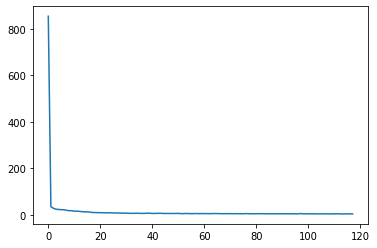

In [161]:
history = model.fit(X_train, train_y, epochs=1000, validation_data = (X_val, val_y), callbacks=[es])
model.save('./models/attempt9.h5')
plt.plot(history.history['loss'], label='train')

In [69]:
'''opt = Adam(learning_rate=0.1)
original_model = Sequential()
original_model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True, activity_regularizer=regularizers.l2(0.03),
                       recurrent_regularizer=regularizers.l2(0.003), dropout=0.2))
original_model.add(Dense(50, activation="sigmoid", activity_regularizer=regularizers.l2(0.005)))
original_model.add(LSTM(20, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=False, activity_regularizer=regularizers.l2(0.01),
                       recurrent_regularizer=regularizers.l2(0.001), dropout=0.2))
original_model.add(Dense(1, activation="relu", activity_regularizer=regularizers.l2(0.001)))
original_model.compile(loss='mse', optimizer=opt)
original_model.summary()'''

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_13 (LSTM)               (None, 1, 50)             14200     
_________________________________________________________________
dense_15 (Dense)             (None, 1, 50)             2550      
_________________________________________________________________
lstm_14 (LSTM)               (None, 20)                5680      
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 21        
Total params: 22,451
Trainable params: 22,451
Non-trainable params: 0
_________________________________________________________________


In [138]:
'''o_history = original_model.fit(X_train, train_y, epochs=1000)
original_model.save('./models/attempt2.h5')
plt.plot(o_history.history['loss'], label='train')'''

"o_history = original_model.fit(X_train, train_y, epochs=1000)\noriginal_model.save('./models/attempt2.h5')\nplt.plot(o_history.history['loss'], label='train')"

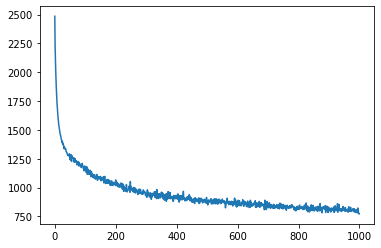

In [51]:
#plt.plot(o_history.history['loss'], label='train')

In [ ]:
'''model.compile(optimizer = "adam", loss="mean_squared_error")
history = model.fit(X_train, train_y, epochs=5000)
model.save('./models/attempt1.h5')
plt.plot(history.history['loss'], label='train')'''

In [203]:
#nnmodel.test_model(x_test, test_y[1:])
pred_ret = model.predict(X_test)
#pred_ret = nnmodel.predict_ret(x_test, y=None)

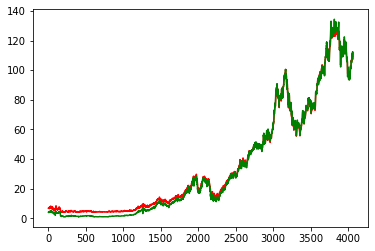

In [76]:
'''pred = model.predict(X_train)
plt.plot(pred, color='r')
plt.plot(train_y, color='g')'''

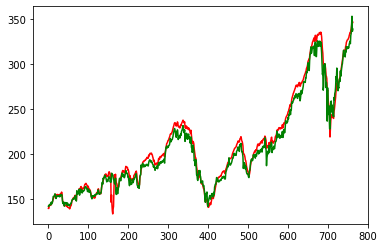

In [204]:
plt.plot(pred_ret, color='r')
plt.plot(np.array(test_y), color='g')
plt.show()

In [171]:
from sklearn.utils import check_array

In [187]:
pred_ret.shape

(763, 1)

In [197]:
'''def mean_absolute_percentage_error(y_true, y_pred): 
    print(y_pred.shape, y_true.shape)
    y_pred = np.array(y_pred)
    #y_true, y_pred = check_array(y_true, y_pred)
    ## Note: does not handle mix 1d representation
    #if _is_1d(y_true): 
    #    y_true, y_pred = _check_1d_array(y_true, y_pred)
    diff = np.divide(np.abs(np.subtract(y_true, y_pred)), y_pred)
    print(diff)
    print(diff.shape)
    return np.mean(diff) * 100'''

In [189]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [215]:
import math
mse = mean_squared_error(test_y, pred_ret)
rmse = math.sqrt(mse)
mae = mean_absolute_error(test_y, pred_ret)
#mape = mean_absolute_percentage_error(np.array(test_y), pred_ret)
print("mse, rmse, mae:" + str((mse,rmse,mae)))

mse, rmse, mae:(61.33516435144111, 7.831676982067194, 6.135088662787722)


array([142.42  , 142.24  , 143.78  , 144.48  , 143.87  , 143.9   ,
       143.9   , 146.8   , 144.8   , 146.75  , 146.6   , 149.05  ,
       153.2   , 153.3   , 153.4   , 153.88  , 156.07  , 155.66  ,
       154.66  , 150.93  , 152.65  , 152.86  , 153.69  , 153.69  ,
       153.25  , 153.8   , 153.32  , 153.6   , 152.76  , 153.18  ,
       155.35  , 154.    , 154.54  , 155.35  , 154.7   , 148.96  ,
       145.6   , 146.9   , 144.6   , 144.49  , 142.45  , 146.71  ,
       145.09  , 145.9   , 145.64  , 146.38  , 145.88  , 143.4   ,
       145.85  , 143.39  , 143.85  , 143.51  , 144.    , 142.65  ,
       144.26  , 144.95  , 145.55  , 145.45  , 147.14  , 149.04  ,
       149.75  , 150.18  , 150.79  , 150.37  , 150.13  , 151.87  ,
       152.88  , 153.83  , 150.    , 149.48  , 148.11  , 159.5   ,
       157.04  , 155.56  , 156.65  , 158.75  , 159.54  , 161.2   ,
       154.65  , 157.42  , 160.14  , 161.4   , 160.78  , 158.02  ,
       157.3   , 157.2   , 159.86  , 159.41  , 159.32  , 159.6

In [213]:
pd.Series(np.array(test_y)) - pd.Series(np.array(pred_ret))

Exception: Data must be 1-dimensional